# 1. GATHER DATA

Three main sources:
 * Manual download from Udacity platform: twitter-archive-enhanced.csv
 * Twitter API using Tweepy library: retweet_count & favorite_count as json
 * Programmatically download from hosted Udacity Servers using Requests Libraries: image_predictions.tsv
 https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [43]:
import pandas as pd
import numpy as np
import tweepy
import json
from datetime import datetime 
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Source 1: twitter-archive-enhanced.csv 
# Open file as pandas data frame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.shape

(2356, 17)

In [455]:
#Store all tweet_id in a separate list
list_id = []
for i in df_archive.tweet_id:
    list_id.append(i)

In [7]:
# Source 2: Twitter API
#Get retweet_count & favorite_count ._json

tweet_list = []
error_list = []

start_time = datetime.now() 

for i in list_id:
    try:
        tweet = tweepy.API(auth).get_status(i, tweet_mode='extended', wait_on_rate_limit =True, wait_on_rate_limit_notify = True)
        tweet_id = tweet._json['id']
        retweets = tweet._json['retweet_count'] 
        favorites = tweet._json['favorite_count'] 


        tweet_list.append({'tweet_id': tweet_id, 'retweets': int(retweets), 'favorites': int(favorites)})
                        
    except Exception as error:
        print(str(tweet_id)+ " _ " + str(error))
        error_list.append(tweet_id)
        
    end_time = datetime.now() - start_time #####
    print('tweet_id: {}'.format(tweet_id))
    print('End time (hh:mm:ss.ms) {}'.format(end_time))

tweet_id: 892420643555336193
End time (hh:mm:ss.ms) 0:00:00.157287
tweet_id: 892177421306343426
End time (hh:mm:ss.ms) 0:00:00.395016
tweet_id: 891815181378084864
End time (hh:mm:ss.ms) 0:00:00.609870
tweet_id: 891689557279858688
End time (hh:mm:ss.ms) 0:00:00.810154
tweet_id: 891327558926688256
End time (hh:mm:ss.ms) 0:00:01.049788
tweet_id: 891087950875897856
End time (hh:mm:ss.ms) 0:00:01.200888
tweet_id: 890971913173991426
End time (hh:mm:ss.ms) 0:00:01.390469
tweet_id: 890729181411237888
End time (hh:mm:ss.ms) 0:00:01.553456
tweet_id: 890609185150312448
End time (hh:mm:ss.ms) 0:00:01.707552
tweet_id: 890240255349198849
End time (hh:mm:ss.ms) 0:00:01.905599
tweet_id: 890006608113172480
End time (hh:mm:ss.ms) 0:00:02.059372
tweet_id: 889880896479866881
End time (hh:mm:ss.ms) 0:00:02.219388
tweet_id: 889665388333682689
End time (hh:mm:ss.ms) 0:00:02.415999
tweet_id: 889638837579907072
End time (hh:mm:ss.ms) 0:00:02.572481
tweet_id: 889531135344209921
End time (hh:mm:ss.ms) 0:00:02.72

In [30]:
# Store resulting list as data frame
df_tweets = pd.DataFrame(tweet_list, columns =['tweet_id', 'favorite_count', 'retweet_count'] )
df_tweets.shape
df_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

(2331, 3)

In [13]:
df_tweet = pd.read_csv('tweet_json.txt', sep=",")
df_tweet.head()
df_tweet.drop(columns = ['user_followers','user_favourites','date_time'], axis=1, inplace=True)

In [4]:
# Source 3: hosted Udacity Servers
# File: image_predictions.tsv
#Download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
#Open file:
df_img = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 2. ASSESS DATA

Identify and document quality and tidiness issue with the dataset after gathering step. 
 * Quality issues are related with dataset content. Low quality data
 * Tidines issues trigger structural issues. Messy data.
 
Key Points

Key points to keep in mind when data wrangling for this project:

   * You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
   * Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
   * Cleaning includes merging individual pieces of data according to the rules of tidy data.
   * The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
   * You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


## First dataset: twitter-archive-enhanced.csv
### Data frame name: df_archive

 * QUALITY:
 * tweet_id had data type integer
 * timestamp has data type object
 * in_reply_to_status_id has 78 non- null values out of 2355
 * in_reply_to_user_id has 78 non- null values out of 2355
 * retweeted_status_id has 181  non-null values out of 2355
 * retweeted_status_user_id has 181  non-null values out of 2355
 * retweeted_status_timestamp has 181  non-null values out of 2355
 * Null values in Name column are stored as None strings.
 * Name column has innacurate values such as: such, a , the etc.
 * rating_denominator has different values
 * Source data has extra characters
 * Remove retweets
 
 
 * TIDINESS
 * doggo, floofer, pupper, puppo are separate columns. Wide Table. 
 * separate table

In [5]:
# Look for data types and nulls 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# Two records in recorded in August
df_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
an              7
Toby            7
Buddy           7
Bailey          7
Leo             6
Milo            6
Scout           6
Dave            6
Jax             6
Stanley         6
Bella           6
Jack            6
Oscar           6
Rusty           6
Koda            6
Sammy           5
             ... 
Skye            1
Rudy            1
Brandy          1
Taz             1
Vinscent        1
Sailer          1
Opie            1
Grady           1
Molly           1
Rodman          1
Orion           1
Mauve           1
Mabel           1
Dutch           1
Rey             1
Mollie          1
Maude           1
Fido            1
Clyde           1
officially      1
Mimosa          1
Beckham         1
Sundance        1
Willow          1
Grizzwald 

In [11]:
#No duplicates
sum(df_archive.tweet_id.duplicated())

0

## Second dataset: tweet_json.txt
### Data frame name: df_tweet

 * QUALITY:
 * tweet_id is data type integer
 
 
 
 * TIDINESS
 * separate dataset

In [14]:
df_tweet.head()


,tweet_id,favorites,retweets
0,892420643555336193,38148,8346
1,892177421306343426,32716,6171
2,891815181378084864,24632,4081
3,891689557279858688,41487,8490
4,891327558926688256,39662,9183


In [74]:
#No missing values. 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
favorites          2342 non-null int64
retweets           2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
date_time          2342 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [80]:
#No duplicates
sum(df_tweet.tweet_id.duplicated())

0

## Third dataset: image_predictions.tsv
### Data frame name: df_img

 * QUALITY:
 * tweet_id is data type integer
 
 
 * TIDINESS
 * p, p_conf, p_dog (1, 2, 3) tell the same informatio

In [15]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
# p1_dog, p2_dog, p3_dog have False records 
df_img.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [64]:
# No missing values
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
#No duplicates
sum(df_img.tweet_id.duplicated())

0

# 3. CLEAN DATA

Now that I went through each table one by one and documented some quality and tidiness issues and will go ahead and start fixing them.

Tininess ISSUES
1. First I will structural issues for df_archive.
Once data structure is clean, it will be easier to join into one dataset and from there work at the quality issues.

In [76]:
#Make copy of the data
df_archive_clean = df_archive.copy()
df_img_clean = df_img.copy()
df_tweet_clean = df_tweet.copy()

In [72]:
# doggo + floofer + pupper + puppo should one categorical variable
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


* DEFINE: 

doggo + floofer + pupper + puppo should one variable

 * CODE

In [77]:
# select the dog stages columns 
dog_list = ['doggo', 'floofer', 'pupper', 'puppo']
# replace the 'None' string with np.nan 
df_archive_clean[dog_list] = df_archive_clean[dog_list].replace('None', np.nan)

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_archive_clean['dog_stage'] = df_archive_clean[dog_list].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_archive_clean.drop(columns = dog_list, axis =1, inplace=True)

 * TEST

In [80]:
df_archive_clean.dog_stage.value_counts()


pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

 * DEFINE
 
 All tables should stored into single dataset
 Second I will join all tables together.
As I made sure there are no duplicates to through off the join, I will do a left join on df_img table. This was I will preserve the dataset within 2075 records needed. It is also easier to work from one dataset

 * CODE

In [84]:
# First Join. df_img and df_archive
join1=pd.merge(left=df_archive_clean, right=df_img_clean, how='right', on = 'tweet_id')
join1.shape

(2075, 25)

In [85]:
# Second join. Join1 and df_tweet
df = pd.merge(left=join1, right=df_tweet,how='left', on = 'tweet_id')
df.shape

(2075, 27)

 * TEST

In [87]:
df_full = df.copy()
df_full.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38148.0,8346.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32716.0,6171.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24632.0,4081.0


* DEFINE

Check for duplicates in big table


 * TEST

In [294]:
#Check again for duplicates
sum(df_full.duplicated())

0

 * DEFINE
 
 Change data types

 * CODE

In [88]:
df_full['tweet_id'] = df_full['tweet_id'].astype(str)
df_full['timestamp'] = pd.to_datetime(df_full['timestamp'])

 * TEST

In [89]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_stage                     321 non-null category
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                   

 * DEFINE
 
 Drop rows that contain retweets

 * CODE

In [90]:
df_full = df_full[pd.isnull(df_full.retweeted_status_id)]
df_full = df_full.drop('retweeted_status_id', 1)
df_full = df_full.drop('retweeted_status_user_id', 1)
df_full = df_full.drop('retweeted_status_timestamp', 1)

 * TEST

In [91]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                306 non-null category
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3               

 * DEFINE
 
 Drop columns with more than 50% null values

 * CODE

In [92]:
df_full.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

 * TEST

In [93]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             306 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorites             1993 non

 * DEFINE
 
Fix content in Source column by extracting the relevant data only.

 * CODE

In [94]:
df_full.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [95]:
#Extract link between delimiters > TEXT <
df_full['source'] = df_full['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])


In [96]:
#Remove rows with no imagines
df_full.dropna(subset=['expanded_urls'], inplace=True)

 * TEST

In [98]:
df_full.groupby('source').count()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
source,,,,,,,,,,,,,,,,,,,,,
TweetDeck,11,11,11,11,11,11,11,2,11,11,...,11,11,11,11,11,11,11,11,11,11
Twitter Web Client,28,28,28,28,28,28,28,1,28,28,...,28,28,28,28,28,28,28,28,28,28
Twitter for iPhone,1955,1955,1955,1955,1955,1955,1955,303,1955,1955,...,1955,1955,1955,1955,1955,1955,1955,1955,1954,1954


* DEFINE

All denominators should be a fix value of 10.

* CODE

In [99]:
df_full.rating_denominator = 10 

 * TEST

In [100]:
df_full.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

 * DEFINE

It looks like the set of columns p1-2-3 p_conf 	p_dog, share the same information. 
p = predicted dog breed
p_conf = prediction coeficient
p_dog = the prediction result True/False

I will go through the values of the columns and keep the records where the prediction predicted correclty the dog breed.

 * CODE

In [101]:
#Solve this issue through a function

#Create empty lists to store extracted values
predicted_breed = []
prediction_coef = []

#Extract values based on the prediction results == True
def extract_pred_values(data):
    if data['p1_dog'] == True:
        predicted_breed.append(data['p1'])
        prediction_coef.append(data['p1_conf'])
    elif data['p2_dog'] == True:
        predicted_breed.append(data['p2'])
        prediction_coef.append(data['p2_conf'])
    elif data['p3_dog'] == True:
        predicted_breed.append(data['p3'])
        prediction_coef.append(data['p3_conf'])
    else:
        predicted_breed.append('NaN')
        prediction_coef.append(0)

df_full.apply(extract_pred_values, axis=1)
df_full['predicted_breed'] = predicted_breed
df_full['prediction_coef'] = prediction_coef


 * TEST

In [104]:
df_full = df_full.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)
df_full.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,favorites,retweets,predicted_breed,prediction_coef
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,38148.0,8346.0,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,32716.0,6171.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,24632.0,4081.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,41487.0,8490.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,39662.0,9183.0,basset,0.555712


 * DEFINE
 
 It looks like a lot of the name values are not accurate.It appears that random characters where parse out from the text column. I will extract the names from the text field using a for loop and string patterns.


 * CODE

In [105]:
df_full.groupby('name').count()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,favorites,retweets,predicted_breed,prediction_coef
name,,,,,,,,,,,,,,
Abby,2,2,2,2,2,2,2,1,2,2,2,2,2,2
Ace,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Acro,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Adele,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aiden,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Aja,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Akumi,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Al,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Albert,2,2,2,2,2,2,2,1,2,2,2,2,2,2


In [106]:
#Use for loop to iterate through rows and extract the name of the dog and place it into a new column name
#Use sentence indicators for patterns.

#Empty list to store new names
name_list = []

for text in df_full['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        name_list.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        name_list.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        name_list.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        name_list.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        name_list.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        name_list.append('NaN')
    
        
df_full['dog_name'] = name_list



In [107]:
#Drop old column name
df_full.drop(columns='name',axis = 1,inplace=True)

 * TEST

In [109]:
df_full.dog_name.value_counts()

NaN         625
Charlie      11
Lucy         10
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Daisy         7
Jax           6
Stanley       6
Koda          6
Bo            6
Bella         6
Toby          6
Bailey        5
Milo          5
Rusty         5
Buddy         5
Scout         5
Louis         5
Chester       5
Leo           5
Oscar         5
Jerry         4
Alfie         4
Gus           4
Clarence      4
           ... 
Monster       1
Jett          1
Tupawc        1
Divine        1
Willow        1
Beckham       1
Gustav        1
Clyde         1
Snoop         1
Laika         1
Kuyu          1
Remus         1
Pluto         1
Angel         1
Spork         1
Durg          1
Chloe         1
Biden         1
Rodman        1
Orion         1
Mauve         1
Mabel         1
Dutch         1
Rey           1
Rover         1
Mollie        1
Maude         1
Fido          1
Molly         1
Samsom        1
Name: dog_name, Length: 

 * DEFINE
 
 Change remaining data types.

 * CODE

In [110]:
#One last change: favorites and retweets should be integers
df_full['favorites'] = df_full['favorites'].fillna(0)
df_full['retweets'] = df_full['retweets'].fillna(0)

df_full['favorites'] = df_full['favorites'].astype('int')
df_full['retweets'] = df_full['retweets'].astype('int')

 * TEST

In [112]:
df_full.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,favorites,retweets,predicted_breed,prediction_coef,dog_name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,38148,8346,NaN,0.000000,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,32716,6171,Chihuahua,0.323581,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,24632,4081,Chihuahua,0.716012,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,41487,8490,Labrador_retriever,0.168086,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,39662,9183,basset,0.555712,Franklin


 * SAVE TABLE AS MASTER DATASET

In [113]:
df_full.to_csv('twitter_archive_master3.csv', index=False, encoding = 'utf-8')

# Analyze and Visualize

With a clean dataset on hands, I will analyze the data and highlight through plots the most intersting findings.
    Target:
    * 3 insights
    * 1 visualization

In [114]:
#Reopen my dataset
df=pd.read_csv('twitter_archive_master3.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,favorites,retweets,predicted_breed,prediction_coef,dog_name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,38148,8346,NaN,0.000000,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,32716,6171,Chihuahua,0.323581,Tilly
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,24632,4081,Chihuahua,0.716012,Archie
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,41487,8490,Labrador_retriever,0.168086,Darla
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,39662,9183,basset,0.555712,Franklin


In [115]:
# First a quick correlation analysis between variables
correlation_results = df.corr()

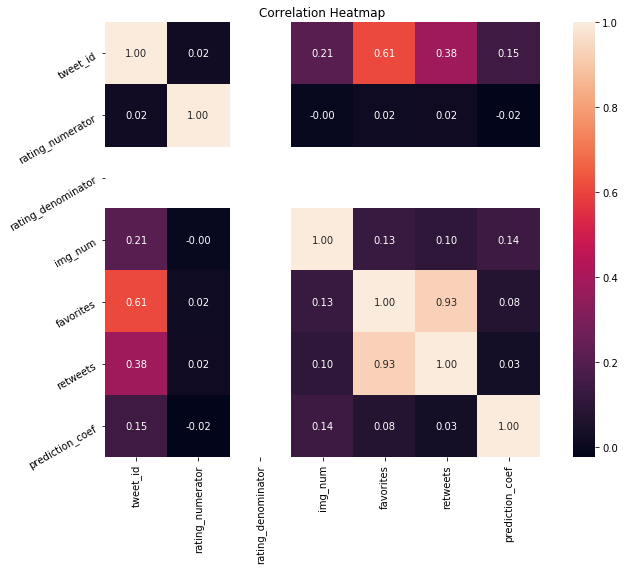

In [116]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation_results, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

The only strong correlation is betwen tweets and retweets, where correlation coefficient is 0.93. Which means that users who add a picture as favourite (like) are more likely to retweet too.


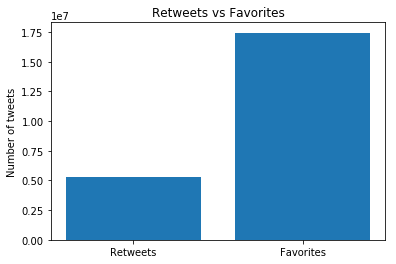

In [117]:
#Let's look at the distribuion for retweets and favorites
retweets_count= df['retweets'].sum()
favorites_count = df['favorites'].sum()

locations = [1, 2]
heights = [retweets_count , favorites_count]
labels = ['Retweets', 'Favorites']
plt.bar(locations, heights, tick_label=labels)
plt.title('Retweets vs Favorites')
#plt.xlabel('Number of patients')
plt.ylabel('Number of tweets');


In [118]:
retweets_count, favorites_count

(5309554, 17454131)

It looks like users are like to add facorites(like a picture than retweet.
I wonder if the divice that the user is loged on has something to do with the fact that they won't retweet.


In [119]:
#We have 3 main sources.
#By far, the most users prefer to follow the dog page on their iphone.
#By are these users the one who also retweet the most?

df.groupby('source')['tweet_id'].count()

source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1955
Name: tweet_id, dtype: int64

In [120]:
#Get the average number of retweets per source. 
tdeck = df.query('source == "TweetDeck"')['retweets'].mean()
web = df.query('source == "Twitter Web Client"')['retweets'].mean()
ihone = df.query('source == "Twitter for iPhone"')['retweets'].mean()


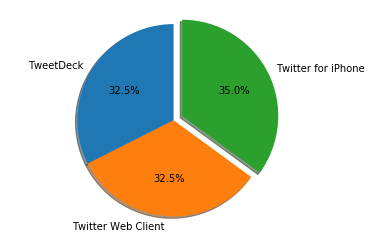

In [121]:
labels = 'TweetDeck', 'Twitter Web Client','Twitter for iPhone'
sizes = [tdeck , web, ihone]
explode = (0, 0, 0.1, )  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Users who browse on WeRateDogs from their iphones are more likely to retweet.

In [122]:
# Now that I learned about the retweets
#I want to know what breed is the most liked by the community.

#Get the mean of the likes
df.favorites.describe()


count      1994.000000
mean       8753.325476
std       12831.681190
min           0.000000
25%        1879.500000
50%        3958.500000
75%       10919.000000
max      164689.000000
Name: favorites, dtype: float64

In [123]:
#Subset over 75% fav
above_75 = df[df['favorites'] > 10919.000000]


In [125]:
#Groupby breed

TOP=above_75.groupby('predicted_breed')['favorites'].sum()

In [126]:
#Breed that the liked the most: THE RETRIEVERS!!!!!
TOP.sort_values(ascending=False)

predicted_breed
golden_retriever                  1468718
Labrador_retriever                1003097
Pembroke                           768006
Chihuahua                          559702
French_bulldog                     518914
Samoyed                            453115
cocker_spaniel                     337691
chow                               235423
Eskimo_dog                         229667
Chesapeake_Bay_retriever           219598
malamute                           214586
pug                                214077
Pomeranian                         196003
Cardigan                           192113
Lakeland_terrier                   161117
toy_poodle                         158385
basset                             152385
German_shepherd                    138298
Great_Pyrenees                     136785
Bedlington_terrier                 136617
Staffordshire_bullterrier          129804
standard_poodle                    125663
whippet                            121307
English_springer  

## Conclusion

WerateDogs page is a fun place for dog lovers. Their datasets gives insights on users preferences, dog breeds as well as pictures. Using the build dataset from sources I was able to find that users prefer to follow Twitter from their iphones, that they rather like a post than retweet and the most likeble breed is the Retriever. 